In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names=['sepal-length','sepal-width','petal-length','petal-width','Class']

df=pd.read_csv(url,names=names)


In [5]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# splitting the dataset

In [6]:
#split the dataset into it's attributes and labels
X=df.iloc[:,:-1].values
y=df.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test=train_test_split(X,y,test_size=0.20)

# Scaler normalization using standard scaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# generating the model and training it using KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
y_pred=classifier.predict(X_test)

C:\Users\THE-HMS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# confusion matrix and classification matrix

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



Text(58.222222222222214, 0.5, 'y_test')

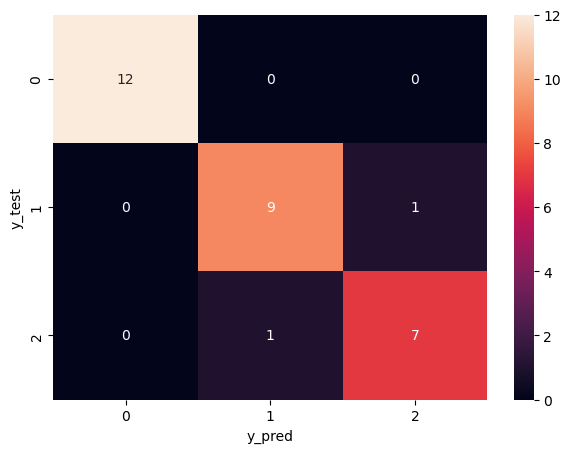

In [14]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')